# Projeto

Neste projeto, vamos usar o conceito de entropia e tudo o que analisamos até o momento para fazer um jogador de forca.

1. Vamos instanciar uma classe JogodeForca, que defini logo abaixo. As regras estão no próprio código para não serem ambíguas.
1. O vocabulário permitido é o que está na URL `https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt`, e o jogador pode ter acesso a esse vocabulário.
1. O objetivo da atividade é fazer um jogador automático de forca que ganha o máximo de vezes possível com apenas 5 vidas.
1. Ao criar um novo jogo, o jogador recebe a informação de quantas letras a palavra tem.
1. Em uma jogada típica, o jogador escolhe uma letra. O "juiz" retorna ua lista com os índices em que essa letra aparece na palavra secreta. Se a letra não aparece, retorna uma lista vazia e o jogador perde uma vida.
1. A qualquer momento, o jogador pode consultar suas vidas (`jogo.vidas`), mas, obviamente, não pode consultar a palavra escolhida.
1. O jogador ganha quando, por saber qual palavra foi escolhida, usa o método `tentar_palavra` informando a palavra correta. Se usar o método mas não acertar, perde o jogo imediatamente.
1. Sempre que o jogador ganha o juiz retorna `True`. Quando ele perde, retorna `False`.


## Descrição do projeto

Neste projeto, o grupo deverá projetar e avaliar um jogador de forca. Em sua avaliação, deve executar um número grande de jogos diferentes (no mínimo 100) e então reportar a probabilidade de seu algoritmo vencer o jogo.

Anotações importantes:

1. O grupo deve enviar um link para o repositório GitHub onde está localizado o projeto.
2. No diretório principal do repositório, deve haver um *notebook* comentado `demo.ipynb`, que, quando executado, executa todos os testes que geram os resultados alcançados.
3. Embora haja muitas maneiras de realizar este algoritmo, é obrigatório que sua solução se baseie em conceitos que aprendemos sobre álgebra linear e teoria da informação, isto é, uma ideia que venha deste curso deve obrigatoriamente se o componente central de seu algoritmo.

**ENTREGAS**
* Link para o repositório onde está o projeto.
* No `README.md` do repositório, deve haver um resumo, com até 400 palavras, explicando qual foi a ideia implementada e como o conceito utilizado (que deve obrigatoriamente vir do nosso curso de álgebra linear e teoria da informação) foi usado para resolver o problema.
* O `demo.ipynb` deve estar comentado, célula a célula, em Markdown, explicando em linguagem natural a importância de cada passo e comentanto os resultados da execução de cada célula.
* O `demo.ipynb` deve ser colocado no repositório já executado, isto é, com todos os dados já gerados, de forma que seja possível visualizá-lo inteiramente sem executar as células.
* Importante: seu algoritmo não precisa ganhar sempre, e esta não é uma competição sobre "quem ganha mais". A avaliação está ligada a como você fez a conexão entre a ideia e a solução.

**RUBRICA**

O projeto será avaliado usando três rubricas. [Duas delas dizem respeito à redação e ao código apresentado](rubricas.md), e são compartilhados por todos os projetos. Em especial, a rubrica de *argumentação* será aplicada ao conjundo do `README.md` e das células em markdown do `demo.ipynb`. Este projeto tem ainda requisitos específicos que estão na rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. A nota final é baseada na rubrica em que o trabalho obtiver o *menor* desempenho. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue, entregue sem completar o `README.md`, entregue sem o `demo.ipynb`, entregue sem resolver o problema que foi proposto, ou entregue sem usar claramente um conceito que venha do curso de álgebra linear/teoria da informação.  | Não fez |
| E | Entregue, com erros metodológicos graves, como usar um conceito que não tem nenhuma conexão com o problema ou implementá-lo de forma equivocada | Entender |
| D | O projeto tem erros na avaliação de desempenho ou deixa de conectar corretamente e sem equívocos o conceito utilizado à solução proposta. | Compreender |
| B | O projeto avalia corretamente jogador, mas não analisa os principais casos de erros. | Aplicar |
| A | O jogador foi avaliado corretamente, e os principais casos de erro foram explicitados, isto é, o grupo mostra como fazer seu jogador "falhar" e a justificativa dessas falhas. | Analisar |

# Classe definida para o jogo da forca

In [268]:
import random
import requests

class JogoDeForca:
    
    # inicia a lista do vocabulário
    def __init__(self):
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        else:
            print("Erro: ", r.status_code)
    
    # inicia as vidas | inicia a palavra
    # retorna o tamanho da palavra
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)

    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    print("Fim de jogo!")
                    return False
                else:
                    return []
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                print("Fim de jogo!")
                return False

# Funções Auxiliares para o jogo

Definição da função FiltraVocabularioTamanho

Recebe como parâmetro o vocabulario e o tamanho da palavra e retorna uma lista com todas as palavras do vocabulário com esse tamanho.


In [274]:
def FiltraVocabularioTamanho(vocabulario,tamanho):
    vocab_filtrado = [palavra for palavra in vocabulario if len(palavra) == tamanho]
    return vocab_filtrado



Definição da função MelhorLetra

Recebe como parâmetro o vocabulario e o chutes e retorna a letra com maior frequência em palavras do vocabulário.
O chutes serve para desconsiderar letras que já foram usadas.

**IMPORTANTE!** Vai retornar a letra que mais aparece em diferentes palavras não a mais frequente no vocabulário total.

In [275]:
def MelhorLetra(vocabulario, chutes):
    # inicializando um dicionario para ver a contagem de letras
    alfabeto = "abcdefghijklmnopqrstuvwxyz"
    ocorrencias_letras = {}
    # povoando o dicionario
    for letra in alfabeto:
        ocorrencias_letras[letra]= 0
    for palavra in vocabulario:
        letras_unicas = set(palavra)
        for letra in letras_unicas:
            ocorrencias_letras[letra] += 1
    
    # Use a função sorted() para classificar o dicionário por seus valores
    dicionario_ordenado = sorted(ocorrencias_letras.items(), key=lambda x: x[1],reverse=True)
    # Retorne a letra com o maior valor
    for letra in dicionario_ordenado:
        if letra[0] not in chutes:
            return letra[0]

Definição da função FiltraVocabularioLetra

A função vai receber o vocabulário e a letra e a lista de indices que a letra aparece na palavra secreta e vai retornar uma lista com todas as palavras do vocabulário que tem a letra nas posições que a letra aparece na palavra secreta.

In [276]:
def FiltraVocabularioLetra(vocabulario,letra, lista_indx_letra):
    vocab_filtrado = []
    requisito_filtro = True
    for palavra in vocabulario:
        requisito_filtro = True
        for indx in lista_indx_letra:
            if palavra[indx] != letra:
                requisito_filtro = False
        if requisito_filtro:
            vocab_filtrado.append(palavra)    
    return vocab_filtrado


Definição da função FiltraVocabularioRemovendoLetra

A função vai receber o vocabulário e uma letra, e vai retorna uma lista com todas as palavras do vocabulário que não tem a letra.

In [277]:
def FiltraVocabularioRemovendoLetra(vocabulario,letra):
    vocab_filtrado = [palavra for palavra in vocabulario if letra not in palavra]  
    return vocab_filtrado


Definição da função VocabularioLowerCase



In [278]:
def VocabularioLowerCase(vocabulario):
    vocab_filtrado = [palavra.lower() for palavra in vocabulario]
    return vocab_filtrado

# Definição do Jogo de forca



**Explicação do passo a passo do jogo está em comentários no código**

Ideia geral do algoritmo:

1- Ele inicializa algumas variáveis, incluindo listas para armazenar palavras que resultaram em vitórias e derrotas, e um objeto JogoDeForca.

2- Depois, um loop é executado para o número de iterações especificadas quando a função é chamada. Em cada iteração, um novo jogo de forca é inicializado.

3- O vocabulário do jogo é convertido para lowercase e depois filtrado para incluir apenas palavras do mesmo tamanho que a palavra escolhida no jogo de forca.

4- O jogo então entra em um loop onde a lógica principal do jogo é executada. Se o vocabulário filtrado tem mais de uma palavra, a função tenta adivinhar uma letra. Caso contrário, tenta adivinhar a palavra.

5- Se o jogador adivinha uma letra corretamente, o vocabulário filtrado é atualizado para incluir apenas palavras que contêm a letra na posição correta. Se a letra não estiver na palavra, o vocabulário filtrado é atualizado para remover palavras que contêm a letra.

6- O jogo termina quando a palavra é adivinhada corretamente (resultando em uma vitória), ou quando o jogador não tem mais vidas (resultando em uma derrota). As palavras que resultaram em vitórias e derrotas são registradas.

7- A função retorna o número de vitórias e derrotas, bem como as palavras que resultaram em vitórias e derrotas.

In [280]:
def main(iteracoes):

    # contabilizar palavras de vitoria e derrota
    win_words = []
    loss_words = []
    
    # Contabilizar vitórias e derrotas
    win = 0
    loss = 0

    # inicializando a classe do jogo
    jogo = JogoDeForca()
    
    # loop das iterações dos jogos
    for i in range(iteracoes):

        # inicializando um novo_jogo
        tamanho_palavra = jogo.novo_jogo()
     
        # padroniza em lowercase todas as palavras do vocabulário
        jogo.content = VocabularioLowerCase(jogo.content)

        # <------ jogador --------> 
        # filtrar o vocabulário pelo tamanho da palavra
        vocabulario_filtrado = FiltraVocabularioTamanho(jogo.content,tamanho_palavra)
        
            
        # variável para saber se o jogo pode continuar ou acabou
        jogando = True
        
        # variavel para saber quantos chutes foram dados
        chutes = []
        
        # loop principal do jogo
        while(jogando):

            # <------ jogador --------> 

            # se o vocabulário tiver mais de uma palavra chutar letra
            if len(vocabulario_filtrado) > 1:
                # Descobre qual é a melhor palavra para chutar
                chute_letra = MelhorLetra(vocabulario_filtrado,chutes)
                chutes.append(chute_letra)

                # <------ jogador --------> 
                # tentar letra
                feedback_chute_letra = jogo.tentar_letra(chute_letra)
            
                # <------ jogador -------->
                # se o feedback for uma lista
                if type(feedback_chute_letra) == list:
                    # letra na palavra
                    if len(feedback_chute_letra) > 0:
                        # filtrar o vocabulário com palavras que contém a letra nas posições corretas
                        vocabulario_filtrado = FiltraVocabularioLetra(vocabulario_filtrado,chute_letra,feedback_chute_letra)
                    # letra não está na palavra
                    else:
                        # filtrar o vocabulário removendo palavras que contém a letra
                        vocabulario_filtrado = FiltraVocabularioRemovendoLetra(vocabulario_filtrado,chute_letra)
            
            # se o vocabulário tiver apenas uma palavra chutar palavra
            else:
                # chutar palavra
                feedback_chute_palavra = jogo.tentar_palavra(vocabulario_filtrado[0])
                # <------ jogador --------> 
                # se o jogador acertar a palavra o jogo acaba
                if feedback_chute_palavra:
                    jogando = False
                    win += 1
                    win_words.append(jogo.palavra)


            # Se a vida chegar a 0 finalizar o jogo
            if not jogo.vidas  > 0:
                loss += 1
                jogando = False
                loss_words.append(jogo.palavra)
        
    return win, loss, win_words, loss_words
    

In [281]:
win, loss, win_words, loss_words = main(10000)

Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
G

In [282]:
print(win,loss)

9434 566


In [283]:
win/(win+loss)

0.9434

# Resultados

In [290]:
# Verificar as letras mais frequentes
import matplotlib.pyplot as plt

def PlotLetrasMaisFrequentes(vocabulario, title):
    contador_letras = {}
    letras = "abcdefghijklmnopqrstuvwxyz"

    for palavra in vocabulario:
        for letra in palavra:
            if letra in letras:
                if letra in contador_letras:
                    contador_letras[letra] += 1
                else:
                    contador_letras[letra] = 1

    # Ordenar as letras mais frequentes

    contador_letras_ordenado = sorted(contador_letras.items(), key=lambda x: x[1], reverse=True)

    # Plotar as letras mais frequentes

    letras = []
    frequencia = []

    for i in contador_letras_ordenado:
        letras.append(i[0])
        frequencia.append(i[1])

    plt.figure(figsize=(20, 10))
    plt.bar(letras, frequencia)
    plt.title(title)
    plt.xlabel('Letras')
    plt.ylabel('Frequência')
    plt.show()

In [291]:
def read_vocabulario():
    with open('vocabulario.txt', 'r') as f:
        vocabulario = f.read().split('\n')
    return vocabulario

Vocabulário Geral

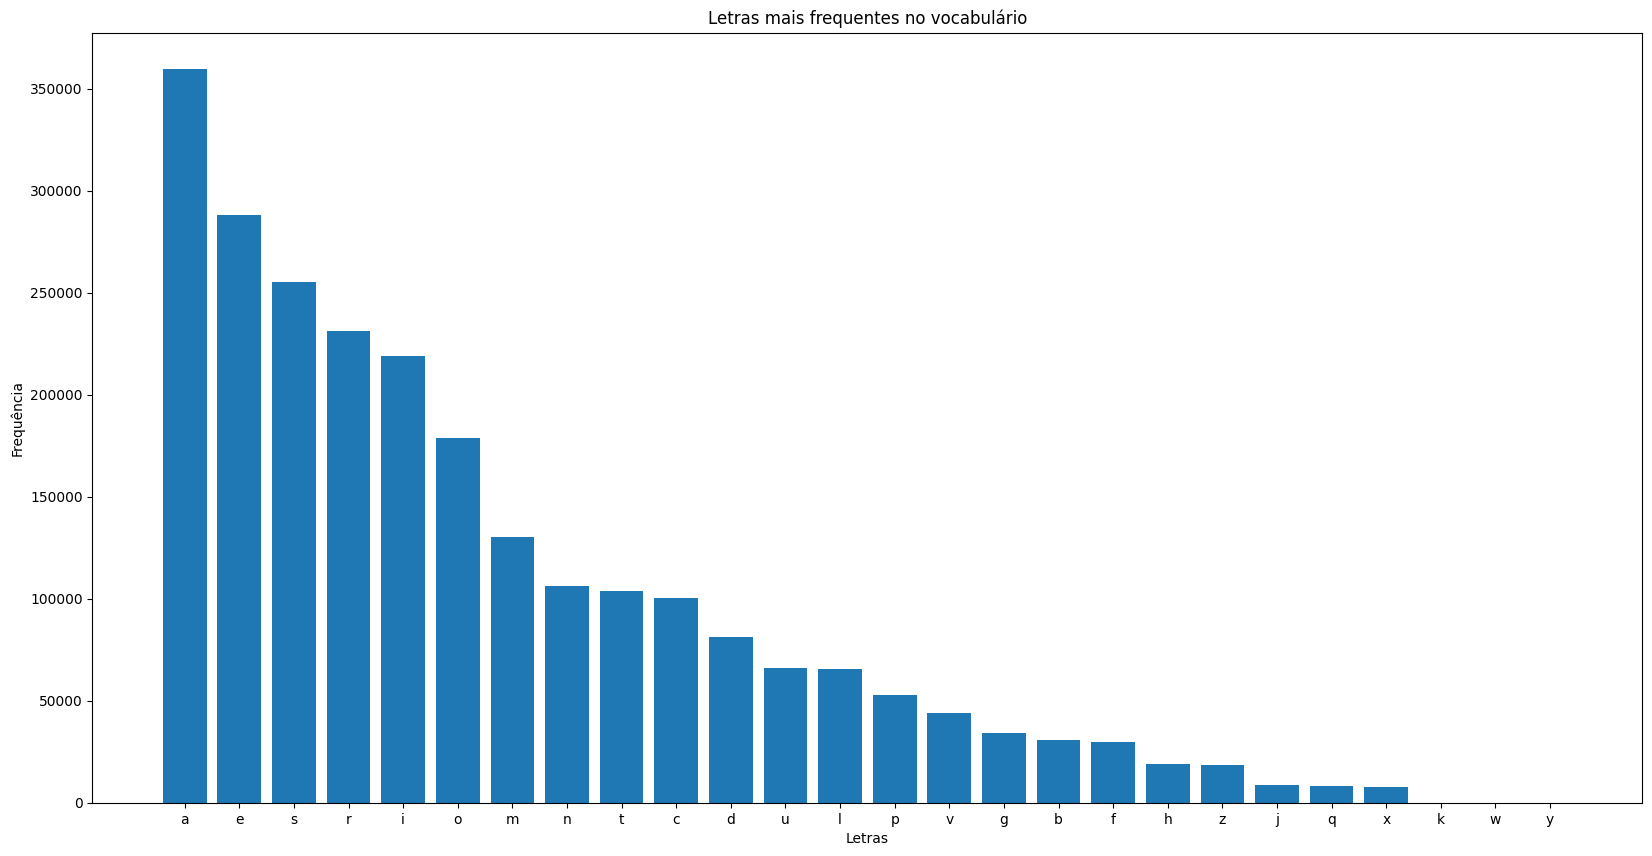

In [292]:
PlotLetrasMaisFrequentes(read_vocabulario(),'Letras mais frequentes no vocabulário')

Vocabulário das palavras que resultaram em vitórias

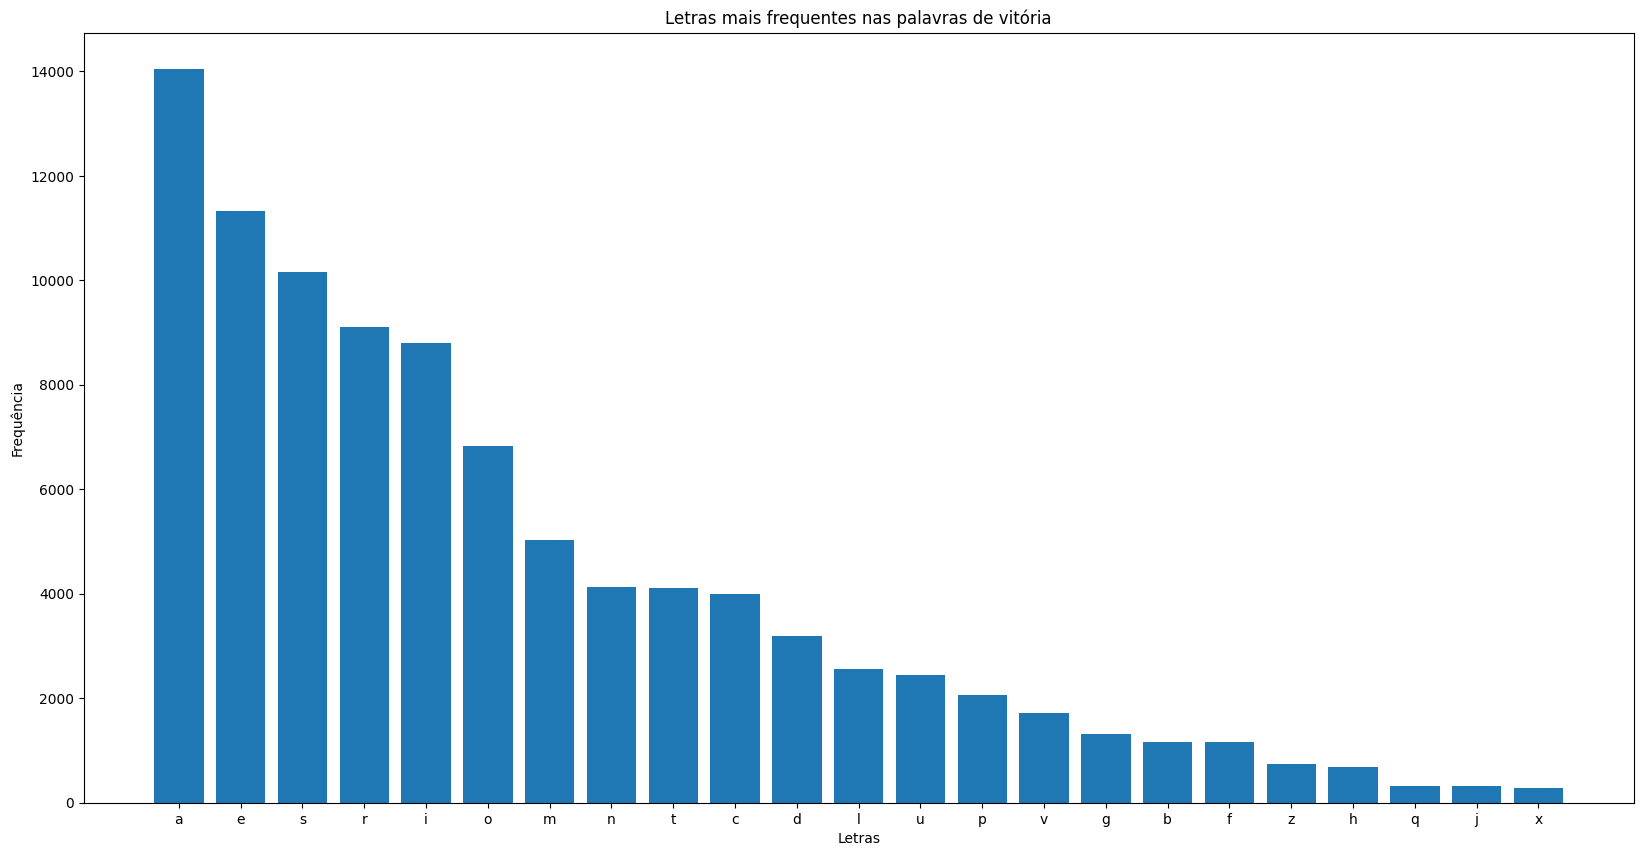

In [293]:
PlotLetrasMaisFrequentes(win_words, 'Letras mais frequentes nas palavras de vitória')

Vocabulário das palavras que resultaram em derrotas

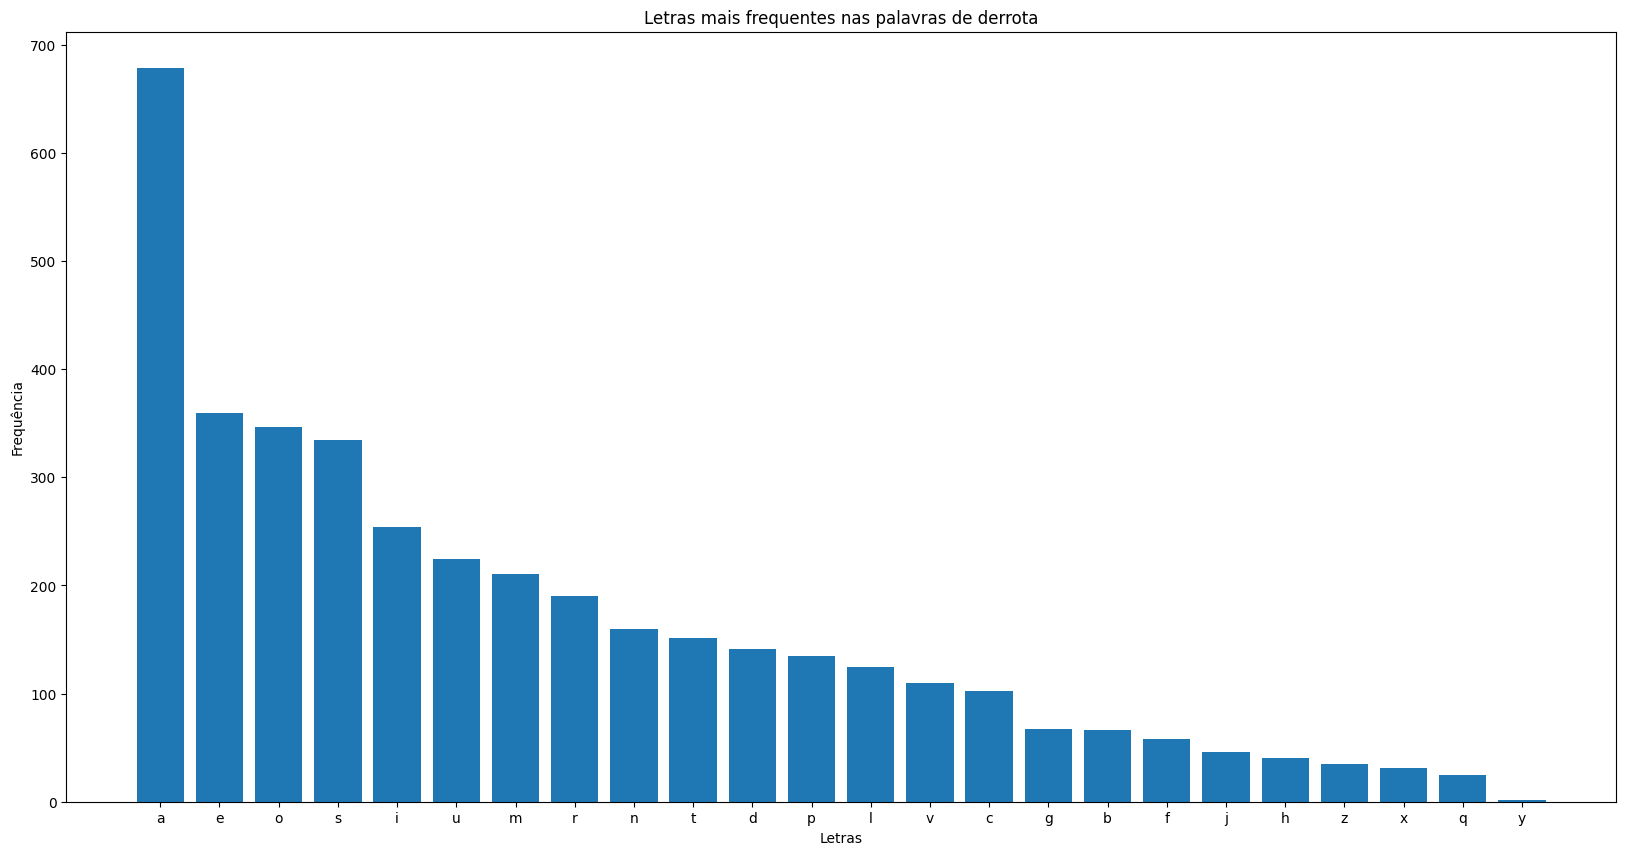

In [294]:
PlotLetrasMaisFrequentes(loss_words, 'Letras mais frequentes nas palavras de derrota')